# Importing  Libraries and Datasets

In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [209]:
df=pd.read_csv("Ecommerce_Customers.csv")
df

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


# Basic understanding of dataset

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### The dataset consists of a total of 8 columns, with 3 columns of object data type and the remaining 5 columns as float data type.

In [215]:
df=df.round(2)

### Observing the float data type variables, it is noticeable that they contain many decimal places, so we will round them off to two decimal places.


In [218]:
df.describe()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.00000,500.000000
mean,33.053340,12.052620,37.060480,3.53336,499.314240
std,0.992513,0.994418,1.010555,0.99926,79.314764
min,29.530000,8.510000,33.910000,0.27000,256.670000
25%,32.340000,11.390000,36.347500,2.93000,445.037500
50%,33.085000,11.980000,37.070000,3.53500,498.890000
75%,33.712500,12.752500,37.720000,4.13000,549.312500
max,36.140000,15.130000,40.010000,6.92000,765.520000


# EDA

In [221]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [223]:
df.duplicated().sum()

0

### No null values and duplicate values are present in the data.


In [226]:
df = df.select_dtypes(include=['float64', 'int64'])
df.corr()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg Session Length,1.000000,-0.027681,-0.034859,0.060123,0.355046
Time on App,-0.027681,1.000000,0.082285,0.029240,0.499315
Time on Website,-0.034859,0.082285,1.000000,-0.047443,-0.002601
Length of Membership,0.060123,0.029240,-0.047443,1.000000,0.809184
Yearly Amount Spent,0.355046,0.499315,-0.002601,0.809184,1.000000


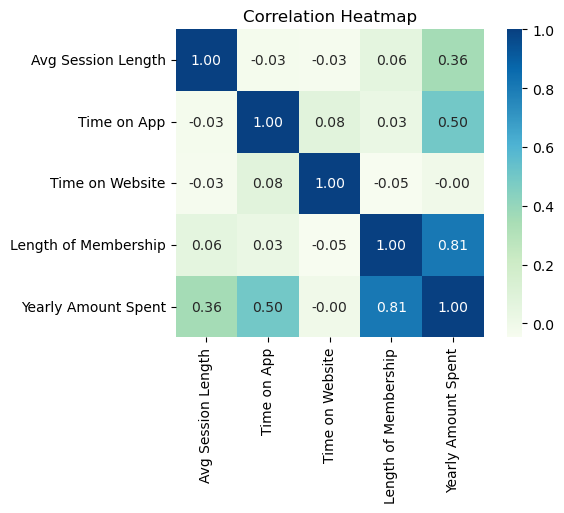

In [228]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='GnBu', square=True)
plt.title('Correlation Heatmap')
plt.show()

### Length of Membership,Time on App and Avg session Length has positive correlation
### Time on Website has a very weak correlation with Yearly Amount Spent,suggesting that it may not be a significant factor in determining spending.

In [231]:
numerical_features = ['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership']


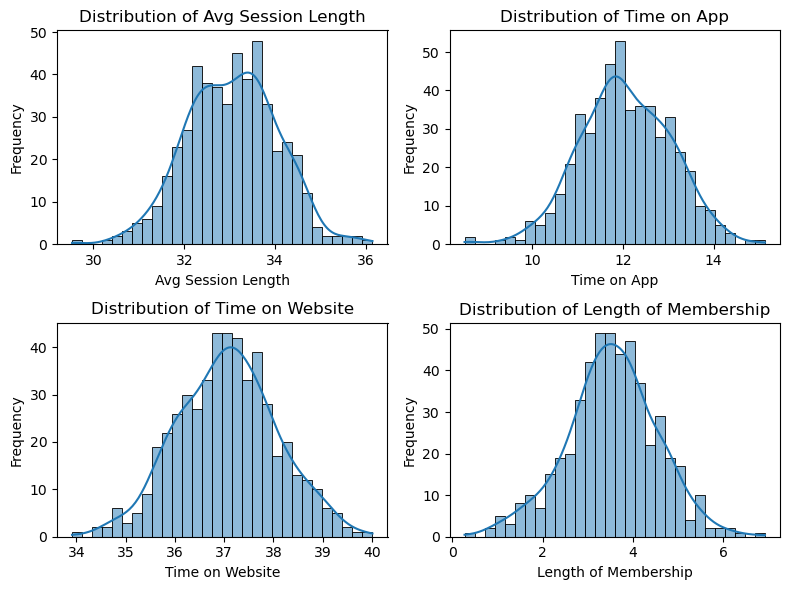

In [233]:
plt.figure(figsize=(8, 6))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)  
    sns.histplot(df[feature], bins=30, kde=True)  
    plt.title(f'Distribution of {feature}')  
    plt.xlabel(feature)  
    plt.ylabel('Frequency')  

plt.tight_layout()  
plt.show()

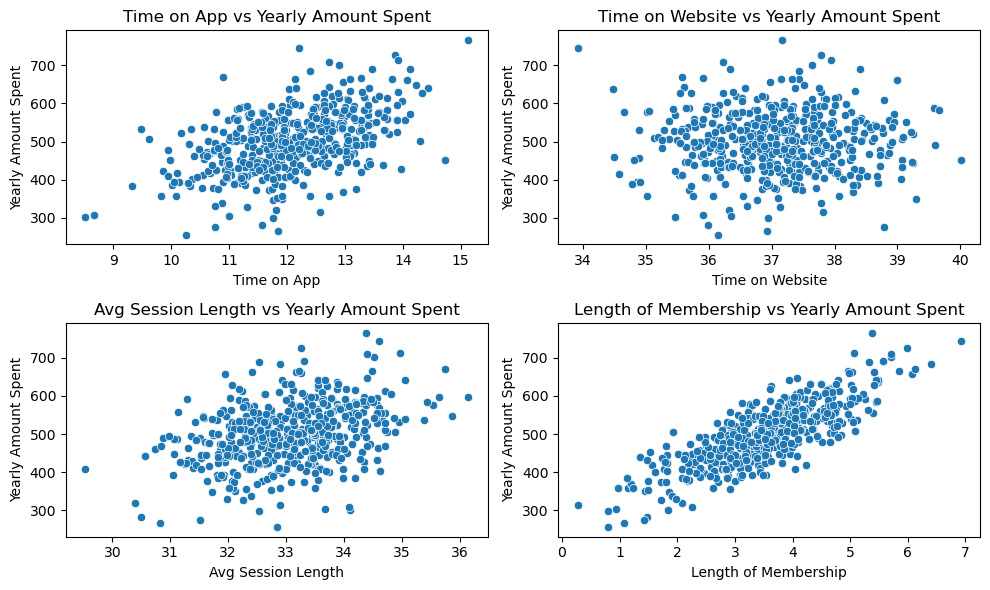

In [234]:
# Create scatter plots
plt.figure(figsize=(10, 6))

# Scatter plot for Time on App vs Yearly Amount Spent
plt.subplot(2, 2, 1)
sns.scatterplot(x='Time on App', y='Yearly Amount Spent', data=df)
plt.title('Time on App vs Yearly Amount Spent')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')

# Scatter plot for Time on Website vs Yearly Amount Spent
plt.subplot(2, 2, 2)
sns.scatterplot(x='Time on Website', y='Yearly Amount Spent', data=df)
plt.title('Time on Website vs Yearly Amount Spent')
plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')

plt.subplot(2, 2,3 )
sns.scatterplot(x='Avg Session Length', y='Yearly Amount Spent', data=df)
plt.title('Avg Session Length vs Yearly Amount Spent')
plt.xlabel('Avg Session Length')
plt.ylabel('Yearly Amount Spent')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Length of Membership', y='Yearly Amount Spent', data=df)
plt.title('Length of Membership vs Yearly Amount Spent')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')


plt.tight_layout()
plt.show()


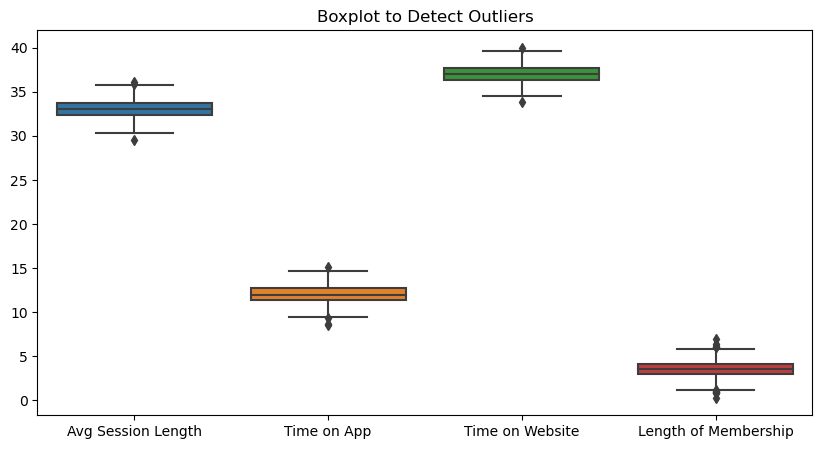

In [235]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Avg Session Length','Time on App','Time on Website','Length of Membership']])
plt.title('Boxplot to Detect Outliers')
plt.show()

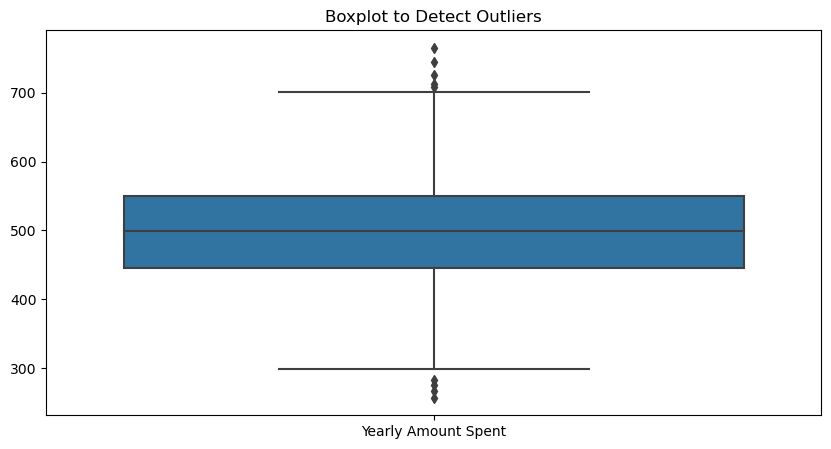

In [236]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Yearly Amount Spent']])
plt.title('Boxplot to Detect Outliers')
plt.show()

# Dropping the Outliers

In [242]:
import pandas as pd

def drop_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Filtering out rows with outliers
        df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df

def calculate_outliers_percentage(df, columns):
    total_rows = len(df)
    outliers_info = {}
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / total_rows) * 100
        
        # Store the results
        outliers_info[column] = {
            'Outlier Count': outlier_count,
            'Outlier Percentage': outlier_percentage
        }
    
    return pd.DataFrame(outliers_info).T

# Assuming 'df' is your DataFrame
# List of numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate and display outlier percentage before dropping outliers
outliers_summary_before = calculate_outliers_percentage(df, numeric_columns)
print("Outliers Summary Before Dropping Outliers:")
print(outliers_summary_before)

# Dropping outliers
df = drop_outliers(df, numeric_columns)

# Calculate and display outlier percentage after dropping outliers
outliers_summary_after = calculate_outliers_percentage(cleaned_df, numeric_columns)
print("\nOutliers Summary After Dropping Outliers:")
print(outliers_summary_after)


Outliers Summary Before Dropping Outliers:
                      Outlier Count  Outlier Percentage
Avg Session Length              3.0                 0.6
Time on App                     4.0                 0.8
Time on Website                 2.0                 0.4
Length of Membership           12.0                 2.4
Yearly Amount Spent             9.0                 1.8


NameError: name 'cleaned_df' is not defined

In [244]:
df

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.50,12.66,39.58,4.08,587.95
1,31.93,11.11,37.27,2.66,392.20
2,33.00,11.33,37.11,4.10,487.55
3,34.31,13.72,36.72,3.12,581.85
4,33.33,12.80,37.54,4.45,599.41
...,...,...,...,...,...
495,33.24,13.57,36.42,3.75,573.85
496,34.70,11.70,37.19,3.58,529.05
497,32.65,11.50,38.33,4.96,551.62
498,33.32,12.39,36.84,2.34,456.47


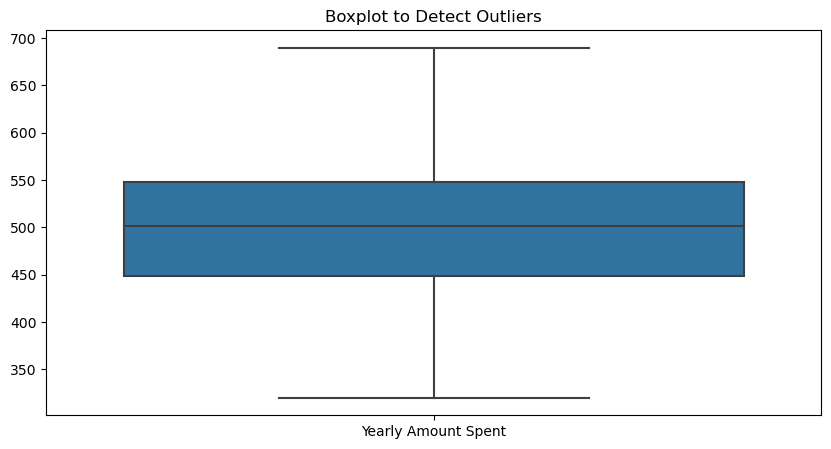

In [246]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Yearly Amount Spent']])
plt.title('Boxplot to Detect Outliers')
plt.show()

# Modelling 

In [249]:
X = df[['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']


In [251]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [255]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

columns_to_scale = ['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])



In [257]:
df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,1.551746,0.620561,2.520451,0.599956,587.95
1,-1.175181,-1.001490,0.200677,-0.999452,392.20
2,-0.039846,-0.771263,0.040000,0.622483,487.55
3,1.350144,1.729834,-0.351650,-0.481334,581.85
4,0.310304,0.767068,0.471819,1.016703,599.41


# Linear Regression

In [260]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [262]:
lm=LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [264]:
y_pred = lm.predict(X_test)

In [266]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [268]:
print(f'Mean Square Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Square Error: 92.27863481952322
Root Mean Squared Error: 9.606176909651582
R-squared: 0.9786136038345352


# Lasso Regression

In [271]:
from sklearn.linear_model import Lasso

In [273]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
l_pred = lasso.predict(X_test)

In [275]:
l_mse = mean_squared_error(y_test, l_pred)
l_r2 = r2_score(y_test, l_pred)
l_rmse = np.sqrt(l_mse)

In [276]:
print(f'Mean Squared Error: {l_mse}')
print(f'R-squared: {l_r2}')
print(f'Root Mean square: {l_rmse}')

Mean Squared Error: 91.5766909878704
R-squared: 0.9787762855744525
Root Mean square: 9.569571097383122


# Ridge Regression

In [280]:
from sklearn.linear_model import Ridge

In [281]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
r_pred = ridge.predict(X_test)

In [282]:
r_mse = mean_squared_error(y_test, l_pred)
r_r2 = r2_score(y_test, l_pred)
r_rmse = np.sqrt(r_mse)

In [285]:
print(f'Mean Squared Error: {r_mse}')
print(f'R-squared: {r_r2}')
print(f'Root Mean square: {r_rmse}')

Mean Squared Error: 91.5766909878704
R-squared: 0.9787762855744525
Root Mean square: 9.569571097383122


# Decision Tree Regressor

In [288]:
from sklearn.tree import DecisionTreeRegressor

In [290]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
dt_reg_pred = dt_reg.predict(X_test)

In [292]:
dt_reg_mse = mean_squared_error(y_test, dt_reg_pred)
dt_reg_r2 = r2_score(y_test, dt_reg_pred)
dt_reg_rmse = np.sqrt(dt_reg_mse)

In [293]:
print(f'Mean Squared Error: {dt_reg_mse}')
print(f'R-squared: {dt_reg_r2}')
print(f'Root Mean square: {dt_reg_rmse}')

Mean Squared Error: 602.2450631578948
R-squared: 0.8604243383684612
Root Mean square: 24.540681798961796


# Random Forest Regressor

In [296]:
from sklearn.ensemble import RandomForestRegressor

In [299]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train,y_train)
rf_reg_pred = rf_reg.predict(X_test)

In [300]:
rf_reg_mse=mean_squared_error(y_test,rf_reg_pred)
rf_reg_r2=r2_score(y_test,rf_reg_pred)
rf_reg_rmse = np.sqrt(rf_reg_mse)

In [302]:
print(f'Mean Squared Error: {rf_reg_mse}')
print(f'R-squared: {rf_reg_r2}')
print(f'Root Mean square: {rf_reg_rmse}')

Mean Squared Error: 226.039148599684
R-squared: 0.9476134124620312
Root Mean square: 15.03459838504787


# Gradient Boosting Regressor

In [304]:
from sklearn.ensemble import GradientBoostingRegressor

In [305]:
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
gb_reg_pred = gb_reg.predict(X_test)

In [306]:
gb_reg_mse = mean_squared_error(y_test, gb_reg_pred)
gb_reg_r2 = r2_score(y_test, gb_reg_pred)
gb_reg_rmse = np.sqrt(gb_reg_mse)

In [307]:
print(f'Mean Squared Error: {gb_reg_mse}')
print(f'R-squared: {gb_reg_r2}')
print(f'Root Mean square: {gb_reg_rmse}')

Mean Squared Error: 167.27567287837633
R-squared: 0.9612323717616943
Root Mean square: 12.933509689112864


#  Polynomial Regression

In [309]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [310]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [311]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

LinearRegression()

In [312]:
poly_pred = poly_reg.predict(X_poly_test)

In [313]:
poly_mse = mean_squared_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)
poly_rmse = np.sqrt(poly_mse)

In [314]:
print(f'Mean Squared Error: {poly_mse}')
print(f'R-squared: {poly_r2}')
print(f'Root Mean square: {poly_rmse}')

Mean Squared Error: 90.47697280223836
R-squared: 0.9790311550665542
Root Mean square: 9.511938435578648


#  K-Nearest Neighbors Regressor (KNN)

In [316]:
from sklearn.neighbors import KNeighborsRegressor

In [317]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [318]:
knn_predictions = knn_reg.predict(X_test)

In [321]:
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
knn_rmse = np.sqrt(knn_mse)

In [323]:
print(f'Mean Squared Error: {knn_mse}')
print(f'R-squared: {poly_r2}')
print(f'Root Mean square: {knn_rmse}')

Mean Squared Error: 438.8352370105261
R-squared: 0.9790311550665542
Root Mean square: 20.948394616545826


In [325]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score




In [326]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression' : Lasso(),
    'Ridge Regression' : Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR Regression': SVR(),
    'Polynomial Regression': LinearRegression(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

In [327]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    results[model_name] = {'RMSE': rmse, 'R²': r2}

# Displaying results
results

results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)
print(results_df)

                           Model       RMSE        R²
0              Linear Regression   9.606177  0.978614
1               Lasso Regression   9.473942  0.979198
2               Ridge Regression   9.571249  0.978769
3                  Random Forest  15.654939  0.943201
4              Gradient Boosting  12.937933  0.961206
5                 SVR Regression  65.212954  0.014392
6          Polynomial Regression   9.606177  0.978614
7  K-Nearest Neighbors Regressor  20.948395  0.898296


In [328]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR Regression': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

# Define hyperparameters for tuning
param_grids = {
    'Linear Regression': {},
    'Lasso Regression': {'alpha': [0.01, 0.1, 1, 10, 100]},
    'Ridge Regression': {'alpha': [0.01, 0.1, 1, 10, 100]},
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'SVR Regression': {
        'C': [0.1, 1, 10, 100],
        'epsilon': [0.01, 0.1, 0.2],
        'kernel': ['linear', 'rbf']
    },
    'K-Nearest Neighbors Regressor': {
        'n_neighbors': [3, 5, 10, 15],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
}

# Initialize results dictionary for tuned models
tuned_results = {}

# Hyperparameter tuning using GridSearchCV
for model_name, model in models.items():
    param_grid = param_grids[model_name]  # Make sure the model names match
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=True)
    r2 = r2_score(y_test, predictions)
    
    tuned_results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'RMSE': rmse,
        'R²': r2
    }

# Displaying tuned results
tuned_results_df = pd.DataFrame.from_dict(tuned_results, orient='index')
tuned_results_df.reset_index(inplace=True)
tuned_results_df.rename(columns={'index': 'Model'}, inplace=True)
print(tuned_results_df)

                           Model  \
0              Linear Regression   
1               Lasso Regression   
2               Ridge Regression   
3                  Random Forest   
4              Gradient Boosting   
5                 SVR Regression   
6  K-Nearest Neighbors Regressor   

                                     Best Parameters        RMSE        R²  
0                                                 {}   92.278635  0.978614  
1                                    {'alpha': 0.01}   92.204065  0.978631  
2                                    {'alpha': 0.01}   92.271426  0.978615  
3  {'max_depth': None, 'min_samples_split': 5, 'n...  252.208672  0.941548  
4  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  169.893886  0.960626  
5     {'C': 100, 'epsilon': 0.2, 'kernel': 'linear'}   95.670103  0.977828  
6  {'algorithm': 'brute', 'n_neighbors': 3, 'weig...  381.745031  0.911527  
